In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df= web.DataReader('TSLA',data_source='yahoo',start='2019-12-01',end='2020-11-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-02,67.276001,65.737999,65.879997,66.973999,30372500.0,66.973999
2019-12-03,67.582001,66.438004,66.524002,67.239998,32868500.0,67.239998
2019-12-04,67.571999,66.570000,67.550003,66.606003,27665000.0,66.606003
2019-12-05,66.884003,65.449997,66.566002,66.073997,18623000.0,66.073997
2019-12-06,67.772003,66.954002,67.000000,67.178001,38062000.0,67.178001
...,...,...,...,...,...,...
2020-10-26,425.760010,410.000000,411.630005,420.279999,28239200.0,420.279999
2020-10-27,430.500000,420.100006,423.760010,424.679993,22686500.0,424.679993
2020-10-28,418.600006,406.000000,416.480011,406.019989,25451400.0,406.019989


[]

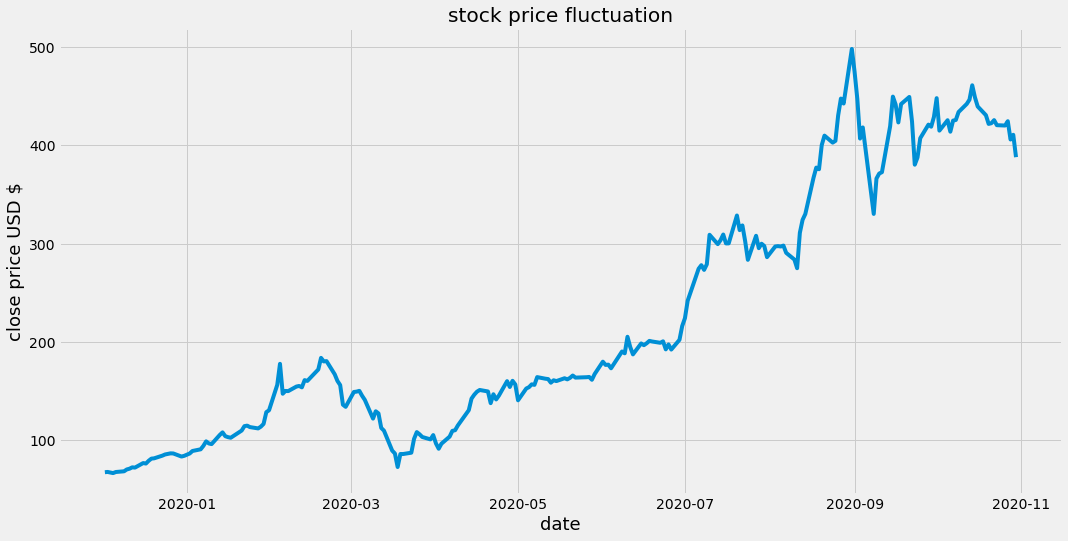

In [4]:
plt.figure(figsize=(16,8))
plt.title("stock price fluctuation")
plt.plot(df['Close'])
plt.xlabel('date',fontsize=18)
plt.ylabel('close price USD $',fontsize=18)
plt.plot()

In [5]:
df1=df.reset_index()['Close']
df1

0       66.973999
1       67.239998
2       66.606003
3       66.073997
4       67.178001
          ...    
227    420.279999
228    424.679993
229    406.019989
230    410.829987
231    388.040009
Name: Close, Length: 232, dtype: float64

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.00208215],
       [0.00269754],
       [0.00123079],
       [0.        ],
       [0.00255411],
       [0.00423833],
       [0.00854606],
       [0.01033209],
       [0.01356172],
       [0.01296485],
       [0.02365784],
       [0.02249645],
       [0.02904827],
       [0.03408707],
       [0.03480425],
       [0.04111086],
       [0.04390094],
       [0.0465337 ],
       [0.04627457],
       [0.03901946],
       [0.04069905],
       [0.04621906],
       [0.05211847],
       [0.0560653 ],
       [0.06417179],
       [0.0748509 ],
       [0.06985374],
       [0.06837773],
       [0.08999043],
       [0.09603328],
       [0.08704765],
       [0.08472953],
       [0.08334606],
       [0.10032714],
       [0.1106731 ],
       [0.11189462],
       [0.10847989],
       [0.10533353],
       [0.10944231],
       [0.11596174],
       [0.14364044],
       [0.14815637],
       [0.20804357],
       [0.25758018],
       [0.18708329],
       [0.19368139],
       [0.19326957],
       [0.204

In [7]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df1,train_size=0.65)

In [8]:
import numpy
def create_dataset(dataset,time_step=10):
    dataX,dataY= [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return  numpy.array(dataX),numpy.array(dataY)

In [9]:
time_step=10
X_train,y_train=create_dataset(train,time_step)
X_test,y_test=create_dataset(test,time_step)

In [10]:
X_train.shape

(139, 10)

In [11]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [13]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 233ms/step - loss: 0.1656 - val_loss: 0.1394
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0938 - val_loss: 0.1128
Epoch 3/100
5/5 [==============================] - 0s 19ms/step - loss: 0.1103 - val_loss: 0.1013
Epoch 4/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0890 - val_loss: 0.1084
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0920 - val_loss: 0.1108
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0910 - val_loss: 0.1040
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0875 - val_loss: 0.0970
Epoch 8/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0858 - val_loss: 0.0967
Epoch 9/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0856 - val_loss: 0.0967
Epoch 10/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0855 - val_loss: 0.0982
Epoch 11/100
5/5 [

In [16]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [17]:
train_predict=scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)
train_predict

array([[216.16446],
       [216.37021],
       [216.46347],
       [218.75641],
       [218.88757],
       [217.7481 ],
       [216.14096],
       [215.86562],
       [213.03787],
       [210.76874],
       [209.79823],
       [210.38893],
       [212.2053 ],
       [213.75345],
       [214.19518],
       [215.90648],
       [215.0216 ],
       [215.83183],
       [216.09898],
       [216.20903],
       [218.1281 ],
       [217.69272],
       [218.28279],
       [218.77905],
       [218.73235],
       [218.44547],
       [217.7923 ],
       [217.66408],
       [217.90587],
       [218.08203],
       [217.29836],
       [216.48914],
       [218.40456],
       [217.86418],
       [216.71037],
       [214.8765 ],
       [211.87695],
       [211.82312],
       [212.04518],
       [212.13524],
       [211.13403],
       [212.54866],
       [214.29625],
       [214.64478],
       [215.41666],
       [214.4633 ],
       [213.86621],
       [216.45164],
       [215.65411],
       [218.24495],


In [18]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

215.5017686399946

In [19]:
math.sqrt(mean_squared_error(y_test,test_predict))

215.01051793875257

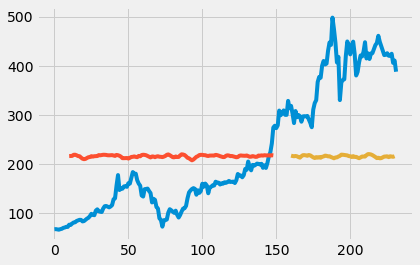

In [20]:
look_back=10
trainpredictplot=numpy.empty_like(df1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :]=train_predict
testpredictplot=numpy.empty_like(df1)
testpredictplot[:,:]=numpy.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] =test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


In [21]:
trainpredictplot=numpy.empty_like(df1)
#trainpredictplot[:,:]=np.nan
#trainpredictplot[look_back:len(train_predict)+look_back, :]=train_predict
trainpredictplot

array([[ 6.94750147e-310],
       [ 6.94750147e-310],
       [ 4.64201331e-310],
       [ 4.64201331e-310],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
       [-1.07732330e+236],
 